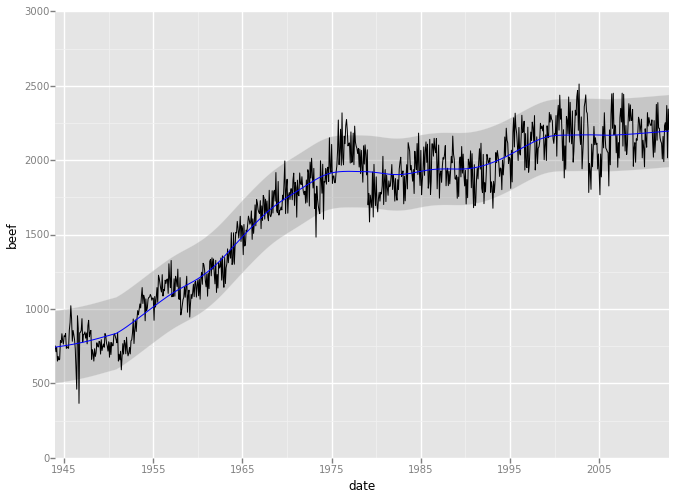

<ggplot: (286207113)>

In [87]:
%matplotlib inline

from ggplot import *

ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

In [88]:
print meat

          date    beef   veal    pork  lamb_and_mutton  broilers  \
0   1944-01-01   751.0   85.0  1280.0             89.0       NaN   
1   1944-02-01   713.0   77.0  1169.0             72.0       NaN   
2   1944-03-01   741.0   90.0  1128.0             75.0       NaN   
3   1944-04-01   650.0   89.0   978.0             66.0       NaN   
4   1944-05-01   681.0  106.0  1029.0             78.0       NaN   
5   1944-06-01   658.0  125.0   962.0             79.0       NaN   
6   1944-07-01   662.0  142.0   796.0             82.0       NaN   
7   1944-08-01   787.0  175.0   748.0             87.0       NaN   
8   1944-09-01   774.0  182.0   678.0             91.0       NaN   
9   1944-10-01   834.0  215.0   777.0            100.0       NaN   
10  1944-11-01   786.0  197.0   944.0             91.0       NaN   
11  1944-12-01   764.0  146.0  1013.0             91.0       NaN   
12  1945-01-01   820.0  119.0  1037.0            100.0       NaN   
13  1945-02-01   816.0   97.0   724.0           

In [102]:
import glob, os
import pandas as pd

theFiles = glob.glob('data/*.csv')
#print theFiles

df_list = []

for i in theFiles:
    df = pd.read_csv(i)
    
    #print df.head(10)
    df = df.T
    df.columns = ['error_rate']
    df['date'] = i.replace('data/output','').replace('.csv','')
    df['samp'] = df.index
    
    #print df.head(10)
    
#     for i in df.columns:
#         print  i
    
    df_list.append(df)

df = pd.concat(df_list)
 
df.head(45) #MAKE THIS LOOK LIKE MEAT date-and beef

,error_rate,date,samp
1000,0.1144,2016-02-05-11-00-00,1000
2000,0.0894,2016-02-05-11-00-00,2000
4000,0.0702,2016-02-05-11-00-00,4000
8000,0.0534,2016-02-05-11-00-00,8000
1000,0.1119,2016-02-05-11-41-39,1000
2000,0.0926,2016-02-05-11-41-39,2000
4000,0.0720,2016-02-05-11-41-39,4000
8000,0.0566,2016-02-05-11-41-39,8000
1000,0.1152,2016-02-05-12-22-35,1000
2000,0.0853,2016-02-05-12-22-35,2000


In [186]:
df['count'] = 1

dfg = df.groupby(['samp'],as_index=False).sum()

dfg['error_rate'] = dfg['error_rate'] / dfg['count']

dfg.head(10)

,samp,error_rate,count
0,1000,0.11471,10
1,2000,0.08724,10
2,4000,0.06922,10
3,8000,0.05479,10


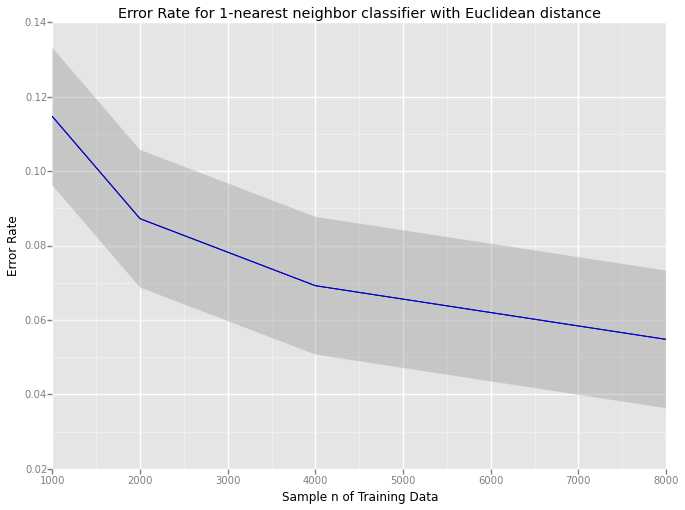

<ggplot: (286148181)>

In [187]:
#plt.errorbar(x,y,yerr=yerr, color='gray', fmt='.', zorder=1)

ggplot(aes(x='samp', y='error_rate'), data=dfg) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.3) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance")
    


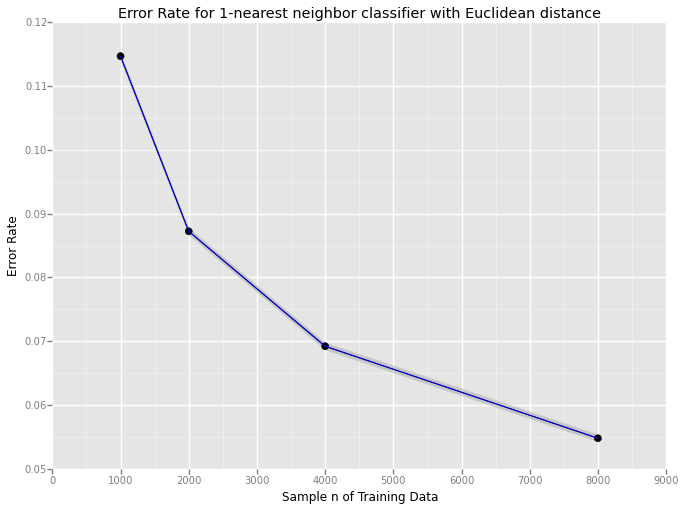

<ggplot: (286377501)>

In [188]:
ggplot(aes(x='samp', y='error_rate'), data=dfg) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.01) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance") + geom_point(size=50) 

In [189]:
g = [1000,2000,4000,8000]
h = [4,3,2,1]

print dfg

dfX = pd.DataFrame({
    "x1": g, 
    "y1": h
})

#ggplot(dfg, aes(x = 'samp', y = 'error_rate')) + geom_rect(dfX, aes(xmin='x1', xmax='x1+1', ymin='y1', ymax='y1+2'), fill = "none")

   samp  error_rate  count
0  1000     0.11471     10
1  2000     0.08724     10
2  4000     0.06922     10
3  8000     0.05479     10


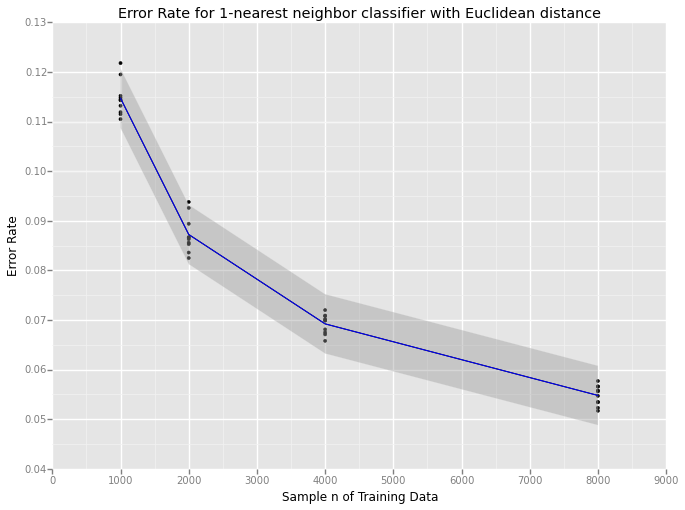

<ggplot: (286761301)>

In [190]:
g = [1000,2000,4000,8000]
h = [4,3,2,1]

dfX = pd.DataFrame({
    "x1": g, 
    "y1": h
})

thePlot = ggplot(dfg, aes(x = 'samp', y = 'error_rate')) + geom_point(df, aes(x = 'samp', y = 'error_rate'), size=10) + geom_line() +\
    stat_smooth(colour='blue', span=0.10) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance")
    
thePlot

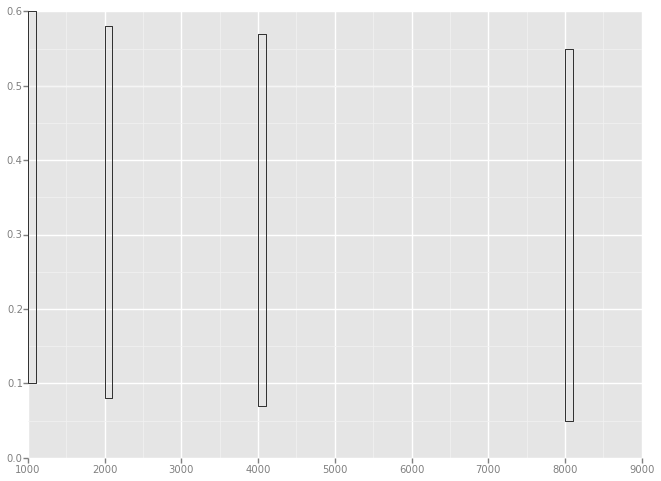

<ggplot: (286148297)>

In [191]:
import pandas as pd
import numpy as np

g = [1000,2000,4000,8000]
h = [0.1,0.08,0.07,0.05]
dfX = pd.DataFrame({
    "xz": g, 
    "yz": h
})

z = ggplot(dfX, aes(xmin='xz', xmax='xz+100', ymin='yz', ymax='yz+0.5')) +\
    geom_rect(fill = "none")
    
z

In [195]:
import pandas as pd
import numpy as np

g = [1000,2000,4000,8000]
h = [0.1,0.08,0.07,0.05]
dfX = pd.DataFrame({
    "xz": g, 
    "yz": h
})

test1 = geom_rect(dfX, aes(xmin='xz', xmax='xz+100', ymin='yz', ymax='yz+0.5'), fill = "none")
    


Exception: Could not evaluate the 'y' mapping: 'error_rate' (original error: name 'error_rate' is not defined)

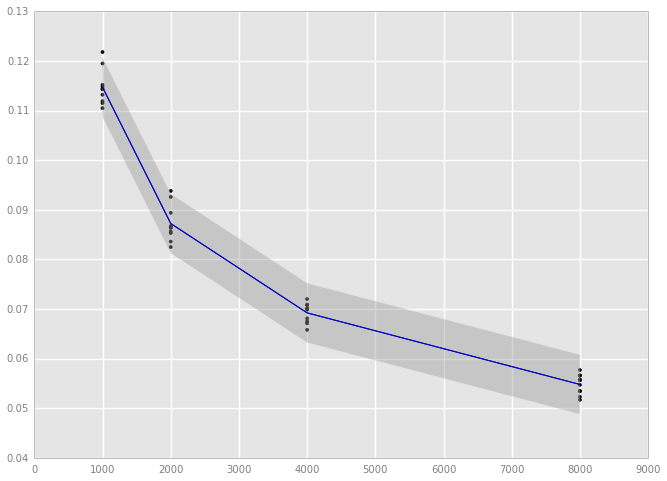

In [198]:
import pandas as pd
import numpy as np

g = [1000,2000,4000,8000]
h = [4,3,2,1]

# g = [0.1,0.2,0.3,0.4]
# h = [0.4,0.3,0.2,0.1]

dfX = pd.DataFrame({
    "xz": g, 
    "yz": h
})
#ggplot(aes(x='x', y='y'), data=dfX) + geom_rect(xmin='x', xmax='x+100', ymin='y', ymax='y+2', fill = "none") 



#p = ggplot(aes(x='x', y='y'), data=dfX)
#x + geom_point(fill='red',size=20)
#x = x + geom_rect(xmin=dfX['xz'], xmax=dfX['xz'], ymin=dfX['yz'], ymax=dfX['yz'], fill = "none")


t = thePlot + test1

t

In [65]:
import matplotlib
matplotlib.style.use('ggplot')

AttributeError: 'module' object has no attribute 'style'

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.16.2'

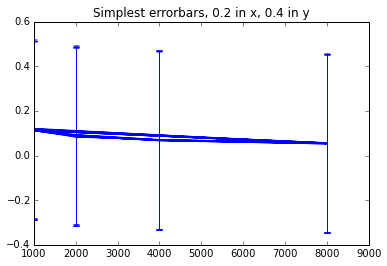

In [25]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = df['samp'] #np.arange(0.1, 4, 0.5) 
y = df['error_rate'] #np.exp(-x)

# example variable error bar values
yerr = 0.1 #0.1 + 0.2*np.sqrt(x)
xerr = 0.1 #0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, yerr=0.4) #, xerr=0.2)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")


In [7]:
ggplot(aes(x='samp', y='error_rate'), data=df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.3) +\
    xlab("Sample n of Training Data") + ylab("Error Rate") +\
    ggtitle("Error Rate for 1-nearest neighbor classifier with Euclidean distance") + geom_errorbar(limits, width=0.2)

NameError: name 'geom_errorbar' is not defined

1.3.1
      error_rate  count
samp                   
1000     0.11471      1
2000     0.08724      1
4000     0.06922      1
8000     0.05479      1
      error_rate  count
samp                   
1000    0.003527      0
2000    0.003654      0
4000    0.001981      0
8000    0.002001      0


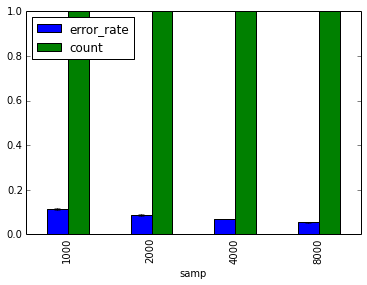

In [8]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')

print matplotlib.__version__


gp3 = df.groupby('samp')#, 'word'))

means = gp3.mean()

errors = gp3.std()

print means


print errors

fig, ax = plt.subplots()

means.plot(yerr=errors, ax=ax, kind='bar')


In [18]:
#import pyplot

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

a = [1,3,5,7]
b = [11,-2,4,19]
plt.pyplot.scatter(a,b)
plt.scatter(a,b)

plt.show()
c = [1,3,2,1]
plt.errorbar(a,b,yerr=c, linestyle="None")

plt.show()

AttributeError: 'module' object has no attribute 'pyplot'

In [10]:
"""
Demo of errorbar function with different ways of specifying error bars.

Errors can be specified as a constant value (as shown in `errorbar_demo.py`),
or as demonstrated in this example, they can be specified by an N x 1 or 2 x N,
where N is the number of data points.

N x 1:
    Error varies for each point, but the error values are symmetric (i.e. the
    lower and upper values are equal).

2 x N:
    Error varies for each point, and the lower and upper limits (in that order)
    are different (asymmetric case)

In addition, this example demonstrates how to use log scale with errorbar.
"""
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()


AttributeError: 'module' object has no attribute 'style'

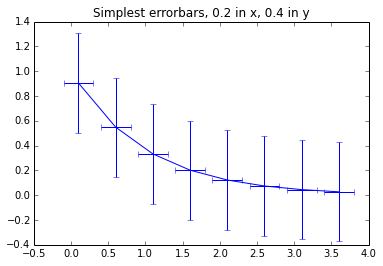

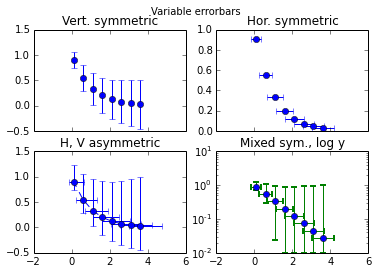

In [11]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()



In [12]:
import pyplot

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

a = [1,3,5,7]
b = [11,-2,4,19]
plt.pyplot.scatter(a,b)
plt.scatter(a,b)

plt.show()
c = [1,3,2,1]
plt.errorbar(a,b,yerr=c, linestyle="None")

plt.show()

ImportError: No module named pyplot

In [17]:
import matplotlib.pyplot as plt
#import matplotlib
plt.style.use('ggplot')
#matplotlib.style.use('ggplot')

AttributeError: 'module' object has no attribute 'style'